## Install and import necessary libraries

In [2]:
!pip install pydriller
import pandas as pd
from pydriller import Repository

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 5.5 MB/s eta 0:00:00


In [ ]:
analysis_df = pd.read_csv('/kaggle/input/stt-labs/final_analysis (1).csv')
final_df = analysis_df.merge(rectified_df.drop(['Overall_diff','Unnamed: 0','Message','Filename'],axis=1),on='Hash')

In [6]:
final_df.to_csv('Lab_2_analysis.csv',index=False)

In [11]:
!pip install bert_score

  Using cached bert_score-0.3.13-py3-none-any.whl.metadata (15 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-man

In [19]:
model

NameError: name 'model' is not defined

In [ ]:
def score_message_quality(model, tokenizer, diffs, messages):
    scores = []
    for diff, msg in zip(diffs, messages):
        eval_prompt = f"""
        You are evaluating commit messages.
        Diff:
        {diff}

        Commit message:
        {msg}

        Does this commit message clearly and accurately describe the diff?
        Give a single integer score from 1 (very poor) to 5 (excellent).
        """
        inputs = tokenizer(eval_prompt, return_tensors="pt").to("cuda")
        outputs = model.generate(**inputs, max_new_tokens=5)
        score = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()
        try:
            score = int(score[0])  # parse first digit
        except:
            score = None
        scores.append(score)
    return scores
score_message_quality()

In [18]:
from bert_score import score

diffs = [
    """def divide(a, b):
    return a / b"""
]

# Developer's original
dev_msgs = ["fix divide function"]

# LLM-generated
model_msgs = ["Handle division by zero in divide function by returning None"]

# Use CodeBERT (12-layer model)
# model_name = "microsoft/codebert-base"

model_name = "microsoft/graphcodebert-base"

P_dev, R_dev, F1_dev = score(
    dev_msgs, diffs,
    model_type=model_name,
    num_layers=12,
    rescale_with_baseline=False
)

P_model, R_model, F1_model = score(
    model_msgs, diffs,
    model_type=model_name,
    num_layers=12,
    rescale_with_baseline=False
)

print("Developer Message F1:", F1_dev.mean().item())
print("Model Message F1:", F1_model.mean().item())

Some weights of RobertaModel were not initialized from the model checkpoint at microsoft/graphcodebert-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at microsoft/graphcodebert-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Developer Message F1: 0.4360831081867218
Model Message F1: 0.4248778522014618


In [1]:
!pip install -U bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 MB 32.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.5 MB/s eta 0:00:00:00:0100:01
  Attempting un

In [25]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model_name = "unsloth/Qwen3-4B-Instruct-2507-unsloth-bnb-4bit"

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load model in 4-bit (bnb) without unsloth
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",        # automatically places on GPU
    torch_dtype=torch.float16
)

# Quick test
inputs = tokenizer("Hello, how are you?", return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=50)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

ImportError: Using `bitsandbytes` 4-bit quantization requires the latest version of bitsandbytes: `pip install -U bitsandbytes`

In [1]:
!git --version

git version 2.34.1


## Myers vs Histogram

In [5]:
import pandas as pd
from pydriller import Repository
import os

def analyze_repos(repo_links, out_csv="consolidated_results.csv"):
    all_file_rows = []

    for repo_link in repo_links:
        repo_name = repo_link.split("/")[-1]
        print(f"\nAnalyzing repository: {repo_name}")

        # Collecting Myers diffs
        file_rows = []
        for commit in Repository(repo_link, only_no_merge = True).traverse_commits():
            for mod in commit.modified_files:
                file_rows.append({
                    'Repository': repo_name,
                    'Commit SHA': commit.hash,
                    'Parent SHA': commit.parents,
                    'Author': commit.author.name,
                    'Commit Message': commit.msg,
                    'Filename': mod.filename,
                    'Old File Path': mod.old_path,
                    'New File Path': mod.new_path,
                    'Change Type': mod.change_type.name,
                    'Diff_Myers': mod.diff
                })


        df_files = pd.DataFrame(file_rows)


        # Collecting Histogram diffs
        hist_diffs = []
        for commit in Repository(repo_link, only_no_merge = True, histogram_diff=True).traverse_commits():
            for mod in commit.modified_files:
                hist_diffs.append(mod.diff)


        df_files['Diff_Histogram'] = hist_diffs
   
        # Adding to consolidated results
        all_file_rows.append(df_files)


    # Concatenating all repos into one DataFrame
    consolidated = pd.concat(all_file_rows, ignore_index=True)


    # Saving CSV
    os.makedirs("output", exist_ok=True)
    out_path = os.path.join("output", out_csv)
    consolidated.to_csv(out_path, index=False)


    print(f"Consolidated dataset saved to {out_path}")
    return consolidated

if __name__ == "__main__":
    repos = [
        "https://github.com/huggingface/datasets",
        "https://github.com/hiyouga/LLaMA-Factory",
        "https://github.com/QuivrHQ/quivr"
    ]
    consolidated_df = analyze_repos(repos)


Analyzing repository: datasets

Analyzing repository: LLaMA-Factory

Analyzing repository: quivr
Consolidated dataset saved to output/consolidated_results.csv


In [6]:
consolidated_df['Discrepancy'] = consolidated_df['Diff_Myers'] != consolidated_df['Diff_Histogram']

In [7]:
consolidated_df.drop(columns=['Repository','Change Type']).head(10)

,Commit SHA,Parent SHA,Author,Commit Message,Filename,Old File Path,New File Path,Diff_Myers,Diff_Histogram,Discrepancy
0,27d9cbb35b71082a6f457d96b5967fe5e5594e72,[],Thomas Wolf,Initial commit,.gitignore,None,.gitignore,"@@ -0,0 +1,28 @@\n+# Compiled python modules.\...","@@ -0,0 +1,28 @@\n+# Compiled python modules.\...",False
1,27d9cbb35b71082a6f457d96b5967fe5e5594e72,[],Thomas Wolf,Initial commit,AUTHORS,None,AUTHORS,"@@ -0,0 +1,8 @@\n+# This is the list of Huggin...","@@ -0,0 +1,8 @@\n+# This is the list of Huggin...",False
2,27d9cbb35b71082a6f457d96b5967fe5e5594e72,[],Thomas Wolf,Initial commit,CONTRIBUTING.md,None,CONTRIBUTING.md,"@@ -0,0 +1,97 @@\n+# How to Contribute\n+\n+Th...","@@ -0,0 +1,97 @@\n+# How to Contribute\n+\n+Th...",False
3,27d9cbb35b71082a6f457d96b5967fe5e5594e72,[],Thomas Wolf,Initial commit,LICENSE,None,LICENSE,"@@ -0,0 +1,202 @@\n+\n+ ...","@@ -0,0 +1,202 @@\n+\n+ ...",False
4,27d9cbb35b71082a6f457d96b5967fe5e5594e72,[],Thomas Wolf,Initial commit,README.md,None,README.md,"@@ -0,0 +1,268 @@\n+# HuggingFace Datasets\n+\...","@@ -0,0 +1,268 @@\n+# HuggingFace Datasets\n+\...",False
5,27d9cbb35b71082a6f457d96b5967fe5e5594e72,[],Thomas Wolf,Initial commit,glue.py,None,datasets/glue.py,"@@ -0,0 +1,592 @@\n+# coding=utf-8\n+# Copyrig...","@@ -0,0 +1,592 @@\n+# coding=utf-8\n+# Copyrig...",False
6,27d9cbb35b71082a6f457d96b5967fe5e5594e72,[],Thomas Wolf,Initial commit,aeslc.py,None,datasets/nlp/aeslc/aeslc.py,"@@ -0,0 +1,119 @@\n+# coding=utf-8\n+# Copyrig...","@@ -0,0 +1,119 @@\n+# coding=utf-8\n+# Copyrig...",False
7,27d9cbb35b71082a6f457d96b5967fe5e5594e72,[],Thomas Wolf,Initial commit,amazon_us_reviews.py,None,datasets/nlp/amazon_us_reviews/amazon_us_revie...,"@@ -0,0 +1,174 @@\n+# coding=utf-8\n+# Copyrig...","@@ -0,0 +1,174 @@\n+# coding=utf-8\n+# Copyrig...",False
8,27d9cbb35b71082a6f457d96b5967fe5e5594e72,[],Thomas Wolf,Initial commit,big_patent.py,None,datasets/nlp/big_patent/big_patent.py,"@@ -0,0 +1,286 @@\n+# coding=utf-8\n+# Copyrig...","@@ -0,0 +1,286 @@\n+# coding=utf-8\n+# Copyrig...",False
9,27d9cbb35b71082a6f457d96b5967fe5e5594e72,[],Thomas Wolf,Initial commit,billsum.py,None,datasets/nlp/billsum/billsum.py,"@@ -0,0 +1,121 @@\n+# coding=utf-8\n+# Copyrig...","@@ -0,0 +1,121 @@\n+# coding=utf-8\n+# Copyrig...",False


In [8]:
# Categorizing files
def categorize_file(filename):
    if pd.isna(filename):
        return "Other"
    fname = filename.lower()
   
    # README
    if "readme" in fname:
        return "README"
   
    # LICENSE
    if "license" in fname:
        return "LICENSE"
   
    # Test files
    if "test" in fname:
        return "Test Code"
   
    # Source code (The repository has only python language)
    if fname.split(".")[-1]=='py':
        return "Source Code"
   
    return "Other"
consolidated_df["File_category"] = consolidated_df["Filename"].apply(categorize_file)

In [9]:
req_df = consolidated_df[(consolidated_df["File_category"]=='Source Code')&(consolidated_df['Discrepancy'])]
print(req_df['Diff_Myers'].iloc[0])
print(req_df['Diff_Histogram'].iloc[0])

@@ -34,33 +34,23 @@ The main library entrypoints are:
 __version__ = "0.0.1"
 
 # Types are pyarrow types
-from pyarrow import (null, bool_,
-                     int8, int16, int32, int64,
-                     uint8, uint16, uint32, uint64,
-                     time32, time64, timestamp, date32, date64, duration,
-                     float16, float32, float64,
-                     binary, string, utf8,
-                     large_binary, large_string, large_utf8,
-                     decimal128,
-                     list_, large_list, map_, struct, union, dictionary)
-from pyarrow import total_allocated_bytes
-
-from . import download, features, load, datasets
-from .load import builder, load
-from .download import GenerateMode
+from pyarrow import (binary, bool_, date32, date64, decimal128, dictionary,
+                     duration, float16, float32, float64, int8, int16, int32,
+                     int64, large_binary, large_list, large_string, large_utf8,
+                 

In [10]:
def count_diff_changes(diff_text):
    added, deleted = 0, 0
    for line in diff_text.splitlines():
        if line.startswith('+') and not line.startswith('+++'):
            added += 1
        elif line.startswith('-') and not line.startswith('---'):
            deleted += 1
    return added, deleted
print(count_diff_changes(req_df['Diff_Histogram'].iloc[1]))
print(count_diff_changes(req_df['Diff_Myers'].iloc[1]))

(114, 151)
(114, 151)


Mismatch Statistics:
      Category  Mismatches
0      LICENSE           0
1        Other         334
2       README          92
3  Source Code         726
4    Test Code          68


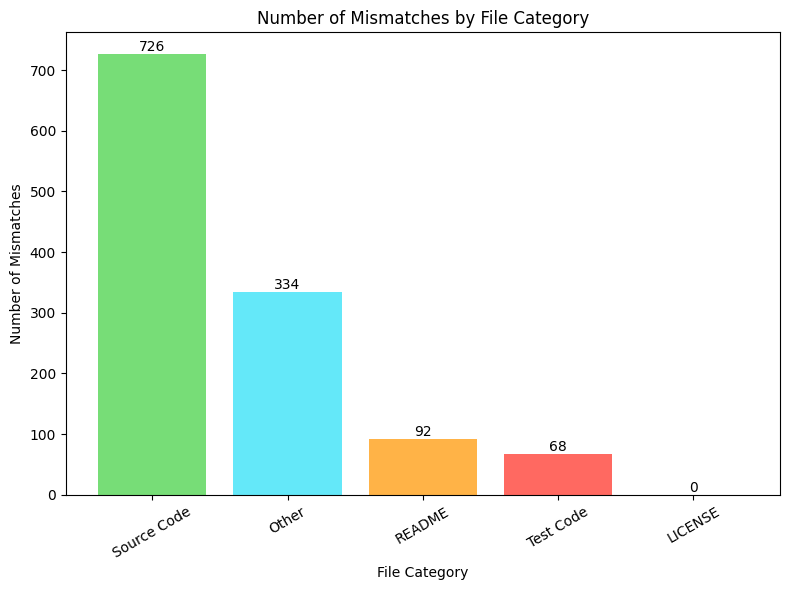

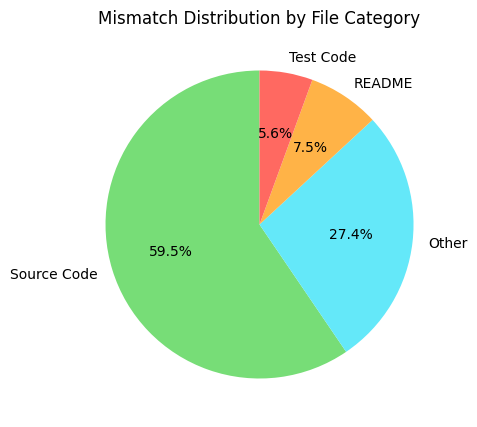

In [12]:
stats = consolidated_df.groupby("File_category")["Discrepancy"].sum().reset_index()
stats.columns = ["Category", "Mismatches"]

# Saving stats to CSV
os.makedirs("output", exist_ok=True)
stats.to_csv("output/mismatch_stats.csv", index=False)

print("Mismatch Statistics:")
print(stats.head())

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

colors = ["#77DD77","#64E8F9", "#FFB347", "#FF6961",
          "#AEC6CF", "#FDFD96", "#CBAACB"]
stats_sorted = stats.sort_values(by="Mismatches",ascending = False)

# # Use light colors (from a colormap)
# colors = cm.GnBu(np.linspace(0, 1, len(stats_sorted)))

# --- Bar plot ---
plt.figure(figsize=(8,6))
bars = plt.bar(stats_sorted["Category"], stats_sorted["Mismatches"], color=colors)

# Add count labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   # X position (center of bar)
        height,                            # Y position (top of bar)
        f"{int(height)}",                  # Label (integer value)
        ha="center", va="bottom", fontsize=10
    )

plt.title("Number of Mismatches by File Category")
plt.xlabel("File Category")
plt.ylabel("Number of Mismatches")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("output/mismatch_barplot.png",transparent=True)
plt.show()

# --- Pie chart (remove 0%) ---
nonzero_stats = stats_sorted[stats_sorted["Mismatches"] > 0]
# colors_pie = cm.GnBu(np.linspace(0, 1, len(nonzero_stats)))

plt.figure(figsize=(5,5), facecolor='none')
plt.pie(
    nonzero_stats["Mismatches"], 
    labels=nonzero_stats["Category"], 
    autopct="%1.1f%%", 
    startangle=90,
    colors=colors
)
plt.title("Mismatch Distribution by File Category")
plt.savefig("output/mismatch_piechart.png", transparent=True)
plt.show()

In [23]:
print("Total Modified files:",len(consolidated_df))
print("Total Mismatches:",consolidated_df["Discrepancy"].sum())
print(f"Total Mismatch percent: {round(consolidated_df['Discrepancy'].sum()/len(consolidated_df)*100,2)}%")

Total Modified files: 66099
Total Mismatches: 1220
Total Mismatch percent: 1.85%


In [ ]:
stats = df.groupby("Category")["Discrepancy"].sum().reset_index()
stats.columns = ["Category", "Mismatches"]

# Saving stats to CSV
os.makedirs("output", exist_ok=True)
stats.to_csv("output/mismatch_stats.csv", index=False)

print("Mismatch Statistics:")
print(stats.head())

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

colors = ["#77DD77","#64E8F9", "#FFB347", "#FF6961",
          "#AEC6CF", "#FDFD96", "#CBAACB"]
stats_sorted = stats.sort_values(by="Mismatches",ascending = False)

# # Use light colors (from a colormap)
# colors = cm.GnBu(np.linspace(0, 1, len(stats_sorted)))

# --- Bar plot ---
plt.figure(figsize=(8,6))
bars = plt.bar(stats_sorted["Category"], stats_sorted["Mismatches"], color=colors)

# Add count labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   # X position (center of bar)
        height,                            # Y position (top of bar)
        f"{int(height)}",                  # Label (integer value)
        ha="center", va="bottom", fontsize=10
    )

plt.title("Number of Mismatches by File Category")
plt.xlabel("File Category")
plt.ylabel("Number of Mismatches")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("output/mismatch_barplot.png",transparent=True)
plt.show()

# --- Pie chart (remove 0%) ---
nonzero_stats = stats_sorted[stats_sorted["Mismatches"] > 0]
# colors_pie = cm.GnBu(np.linspace(0, 1, len(nonzero_stats)))

plt.figure(figsize=(5,5), facecolor='none')
plt.pie(
    nonzero_stats["Mismatches"], 
    labels=nonzero_stats["Category"], 
    autopct="%1.1f%%", 
    startangle=90,
    colors=colors
)
plt.title("Mismatch Distribution by File Category")
plt.savefig("output/mismatch_piechart.png", transparent=True)
plt.show()

In [1]:
!git clone https://github.com//unslothai/unsloth.git /kaggle/working/unsloth

Cloning into '/kaggle/working/unsloth'...
remote: Enumerating objects: 14313, done.
remote: Counting objects: 100% (773/773), done.
remote: Compressing objects: 100% (230/230), done.
remote: Total 14313 (delta 705), reused 543 (delta 543), pack-reused 13540 (from 5)
Receiving objects: 100% (14313/14313), 7.71 MiB | 14.97 MiB/s, done.
Resolving deltas: 100% (10718/10718), done.


Cloning into '/kaggle/working/unsloth'...
remote: Enumerating objects: 14210, done.
remote: Counting objects: 100% (695/695), done.
remote: Compressing objects: 100% (193/193), done.
remote: Total 14210 (delta 640), reused 502 (delta 502), pack-reused 13515 (from 3)
Receiving objects: 100% (14210/14210), 7.64 MiB | 25.75 MiB/s, done.
Resolving deltas: 100% (10649/10649), done.


In [2]:
!pip install pydriller

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 3.6 MB/s eta 0:00:00


In [6]:
# Keywords used to identify bug-fix commits
keywords = ["fixed", "bug", "fixes", "fix", "crash", "solves", "resolves", "issue", "regression", "fall back", "assertion", "coverity", "reproducible", "stack-wanted", "steps-wanted", "testcase", "failur", "fail", "npe", "except",
"broken", "differential testing", "error", "hang", "test fix", "steps to reproduce", "crash", "assertion", "failure", "leak", "stack trace", "heap overflow", "freez", "problem", "overflow", "avoid", "workaround", "break", "stop"]

In [8]:
from pydriller import Repository
import pandas as pd
bug_fix_df = []
diff_analysis_df = []

Repo_path = "/kaggle/working/unsloth"
# Traversing commits using PyDriller
for commit in Repository(Repo_path).traverse_commits():
    for keyword in keywords:
        if keyword in commit.msg:
            bug_fix_df.append({
                'Hash': commit.hash,
                'Author': commit.author.name,
                'Message': commit.msg,
                'Hashes of parents': commit.parents,
                'Is a merge commit?': len(commit.parents) > 1,
                'List of modified files': [mod.filename for mod in commit.modified_files],
            })

            if commit.modified_files:  # normal case
                for mod in commit.modified_files:
                    diff_analysis_df.append({
                        'Hash': commit.hash,
                        'Author': commit.author.name,
                        'Message': commit.msg,
                        'Filename': mod.filename,
                        'Change Type': mod.change_type.name,
                        'Source Code (before)': mod.source_code_before,
                        'Source Code (current)': mod.source_code,
                        'Diff': mod.diff
                    })
            break
# Create DataFrames
bug_fix_df = pd.DataFrame(bug_fix_df)
diff_analysis_df = pd.DataFrame(diff_analysis_df)

In [9]:
bug_fix_df

,Hash,Author,Message,Hashes of parents,Is a merge commit?,List of modified files
0,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",[3aa16bb452ab82d7a2b2987ec3bfb47c6812582c],False,"[README.md, Discord.png, LAION 2GPU.png, LAION..."
1,2d5d88487463e76f75002be3b2704267ec96e68a,Daniel Han-Chen,tokenizer pad fix,[28f3b971d21e469fb985f384db10a03982c4ce12],False,"[_utils.py, llama.py, mistral.py]"
2,f380cc1170447800c112dc8568bdff3dd34c79a3,Daniel Han-Chen,Fix Mistral\n\nBlockDiagonalCausalMask fix cou...,[399f8ed56f40df0919208d1ffdee64a31a1b22c8],False,"[README.md, mistral.py]"
3,de855c2afa68ada67d8b3caad4eb9bb592bf4a4f,Daniel Han,Small fixes (#48)\n\n* Fix generation for GQA\...,[725e581539a0755beb23aaff684608db4e42160a],False,"[README.md, unsloth made with love.png, unslot..."
4,51dd120e354cd2223df7ebe2240fb6d1a76108c5,Daniel Han,Fix RoPE Scaling issues (#52)\n\n* Fix RoPE Sc...,[627acc4bb37d5a0354a86c0783be20162f0940b2],False,"[llama.py, mistral.py]"
...,...,...,...,...,...,...
364,91b2a22548b99e034f89c2a76ca5b4eb59f41f76,Daniel Han,Update import_fixes.py,[a656a3df6e467556f19631e4b25da4b61b2a01fd],False,[import_fixes.py]
365,7ce3e3b2ce78bfa0074143b852eb9ab0decbafb7,Roland Tannous,fixed save_pretrained_torchao and associated t...,[91b2a22548b99e034f89c2a76ca5b4eb59f41f76],False,"[test_unsloth_save.py, mapper.py, save.py]"
366,978f73ed862ac1c10954cb27eb30e543f77d0421,Daniel Han,Bug fixes (#3266)\n\n* Fix mamba\n\n* Update l...,[cd71b1bb964098b0a2d8451eac48be53e08568b5],False,"[pyproject.toml, __init__.py, llama.py, mistra..."
367,ff6cbb03d0c2d11fe15c844bfc635eb24f533243,DoubleMathew,llama vision inference fix (#3270)\n\n* llama ...,[c19a002a779ab08f207e0316013b16ea32885b3c],False,[vision.py]


In [11]:
diff_analysis_df

,Hash,Author,Message,Filename,Change Type,Source Code (before),Source Code (current),Diff
0,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",README.md,MODIFY,"<div class=""align-center"">\n <img src=""./imag...","<div class=""align-center"">\n <img src=""./imag...","@@ -1,23 +1,25 @@\n <div class=""align-center"">..."
1,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",Discord.png,MODIFY,PNG\r\n\n   \rIHDR          sRGB     ...,PNG\r\n\n   \rIHDR  }     8]    IDATx\t...,Binary files a/images/Discord.png and b/images...
2,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",LAION 2GPU.png,ADD,None,PNG\r\n\n   \rIHDR    A    ȫIDATx \k]\...,Binary files /dev/null and b/images/LAION 2GPU...
3,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",LAION 2GPU.svg,DELETE,"<?xml version=""1.0"" encoding=""utf-8"" standalon...",None,"@@ -1,1518 +0,0 @@\n-<?xml version=""1.0"" encod..."
4,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",SlimOrca 1GPU.svg,DELETE,"<?xml version=""1.0"" encoding=""utf-8"" standalon...",None,"@@ -1,1424 +0,0 @@\n-<?xml version=""1.0"" encod..."
...,...,...,...,...,...,...,...,...
1242,978f73ed862ac1c10954cb27eb30e543f77d0421,Daniel Han,Bug fixes (#3266)\n\n* Fix mamba\n\n* Update l...,llama.py,MODIFY,# Copyright 2023-present Daniel Han-Chen & the...,# Copyright 2023-present Daniel Han-Chen & the...,"@@ -1236,7 +1236,7 @@ def CausalLM_fast_forwar..."
1243,978f73ed862ac1c10954cb27eb30e543f77d0421,Daniel Han,Bug fixes (#3266)\n\n* Fix mamba\n\n* Update l...,mistral.py,MODIFY,# Copyright 2023-present Daniel Han-Chen & the...,# Copyright 2023-present Daniel Han-Chen & the...,"@@ -300,17 +300,30 @@ def MistralForCausalLM_f..."
1244,978f73ed862ac1c10954cb27eb30e543f77d0421,Daniel Han,Bug fixes (#3266)\n\n* Fix mamba\n\n* Update l...,rl.py,MODIFY,# Copyright 2023-present Daniel Han-Chen & the...,# Copyright 2023-present Daniel Han-Chen & the...,"@@ -513,7 +513,7 @@ def _patch_trl_rl_trainers..."
1245,ff6cbb03d0c2d11fe15c844bfc635eb24f533243,DoubleMathew,llama vision inference fix (#3270)\n\n* llama ...,vision.py,MODIFY,# Copyright 2023-present Daniel Han-Chen & the...,# Copyright 2023-present Daniel Han-Chen & the...,"@@ -206,7 +206,7 @@ def unsloth_base_fast_gene..."


## LLM inference

In [10]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Loading tokenizer
tokenizer = AutoTokenizer.from_pretrained("mamiksik/CommitPredictorT5")

# Loading model and moving it to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model = AutoModelForSeq2SeqLM.from_pretrained("mamiksik/CommitPredictorT5",device_map="auto")

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Using device: cpu


config.json: 0.00B [00:00, ?B/s]

2025-09-05 18:39:51.613955: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757097591.828956      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757097591.888682      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


KeyboardInterrupt: 

In [12]:
import torch, gc, time

def predict_batch(model, tokenizer, commit_msgs, diffs, device="cuda"):
    system_prompt = (
        "You are given a code diff and the original developer commit message. "
        "Your task is to rewrite the commit message so that it is concise, "
        "grammatically correct, and clearly describes the changes made in the diff."
    )

    # Build prompts
    texts = []
    for commit_msg, diff in zip(commit_msgs, diffs):
        messages = [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": f"Diff:\n{diff}\n\nOriginal commit message: {commit_msg}"}
        ]
        text = tokenizer.apply_chat_template(
            messages,
            tokenize=False,
            add_generation_prompt=True,
        )
        texts.append(text)

    # Tokenize batch
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True).to(device)

    # Record input length (for trimming)
    input_len = inputs.input_ids.shape[1]

    # Generate
    start_time = time.time()
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            num_beams=5,
            do_sample=True,
            top_p=0.9,
            max_new_tokens=100,  # safe cap
            early_stopping=True
        )
    end_time = time.time()
    print("Time taken for batch of", len(commit_msgs), ":", round(end_time - start_time, 2), "seconds")

    # Decode
    predictions = []
    for output in outputs:
        pred = tokenizer.decode(output[input_len:], skip_special_tokens=True).strip()
        predictions.append(pred)

    # Free memory
    del inputs, outputs
    torch.cuda.empty_cache()
    gc.collect()

    return predictions

In [8]:
BATCH_SIZE = 20 # tune based on GPU memory

all_predictions = []

for i in range(0, len(diff_analysis_df), BATCH_SIZE):
    batch_texts = diff_analysis_df["Diff"].iloc[i:i+BATCH_SIZE].tolist()
    preds = predict_batch(model, batch_texts, device="cuda")
    all_predictions.extend(preds)

# Adding as a new column
diff_analysis_df["LLM_inference"] = all_predictions

Time taken for batch of 20 : 5.36007833480835 seconds.
Time taken for batch of 20 : 5.279646873474121 seconds.
Time taken for batch of 20 : 4.7002716064453125 seconds.
Time taken for batch of 20 : 5.556906461715698 seconds.
Time taken for batch of 20 : 5.836158752441406 seconds.
Time taken for batch of 20 : 5.273885726928711 seconds.
Time taken for batch of 20 : 5.291773557662964 seconds.
Time taken for batch of 20 : 5.861851692199707 seconds.
Time taken for batch of 20 : 5.017362356185913 seconds.
Time taken for batch of 20 : 4.471691370010376 seconds.
Time taken for batch of 20 : 5.034398794174194 seconds.
Time taken for batch of 20 : 5.0324387550354 seconds.
Time taken for batch of 20 : 5.047799587249756 seconds.
Time taken for batch of 20 : 5.031895637512207 seconds.
Time taken for batch of 20 : 5.311582088470459 seconds.
Time taken for batch of 20 : 5.620614051818848 seconds.
Time taken for batch of 20 : 5.081935167312622 seconds.
Time taken for batch of 20 : 5.056572675704956 sec

In [9]:
diff_analysis_df

,Hash,Author,Message,Filename,Change Type,Source Code (before),Source Code (current),Diff,LLM_inference
0,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",README.md,MODIFY,"<div class=""align-center"">\n <img src=""./imag...","<div class=""align-center"">\n <img src=""./imag...","@@ -1,23 +1,25 @@\n <div class=""align-center"">...",add more info about nvidia gpus
1,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",Discord.png,MODIFY,PNG\r\n\n   \rIHDR          sRGB     ...,PNG\r\n\n   \rIHDR  }     8]    IDATx\t...,Binary files a/images/Discord.png and b/images...,distro binary files
2,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",LAION 2GPU.png,ADD,None,PNG\r\n\n   \rIHDR    A    ȫIDATx \k]\...,Binary files /dev/null and b/images/LAION 2GPU...,distinguish 2gpu image from null
3,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",LAION 2GPU.svg,DELETE,"<?xml version=""1.0"" encoding=""utf-8"" standalon...",None,"@@ -1,1518 +0,0 @@\n-<?xml version=""1.0"" encod...",add missing missing nodes in skeleton skeleton
4,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",SlimOrca 1GPU.svg,DELETE,"<?xml version=""1.0"" encoding=""utf-8"" standalon...",None,"@@ -1,1424 +0,0 @@\n-<?xml version=""1.0"" encod...",add missing missing svg elements
...,...,...,...,...,...,...,...,...,...
1230,9050d6f5278e2373e66d17fc9ac8c2ec4f986e7e,Roland Tannous,tests for mxfp4 and quantized models merge fix...,run_test.sh,ADD,None,"#!/bin/bash\nset -e\n\necho ""=================...","@@ -0,0 +1,18 @@\n+#!/bin/bash\n+set -e\n+\n+e...",add missing line
1231,9050d6f5278e2373e66d17fc9ac8c2ec4f986e7e,Roland Tannous,tests for mxfp4 and quantized models merge fix...,test_merged_model.py,ADD,None,# inference_on_merged.py\nfrom unsloth import ...,"@@ -0,0 +1,55 @@\n+# inference_on_merged.py\n+...",add test for merge
1232,9050d6f5278e2373e66d17fc9ac8c2ec4f986e7e,Roland Tannous,tests for mxfp4 and quantized models merge fix...,train_and_merge.py,ADD,None,# train_and_merge.py\nfrom unsloth import Fast...,"@@ -0,0 +1,71 @@\n+# train_and_merge.py\n+from...",add examples to train_and_merge
1233,9050d6f5278e2373e66d17fc9ac8c2ec4f986e7e,Roland Tannous,tests for mxfp4 and quantized models merge fix...,test_merge_4bit_validation.py,ADD,None,from unsloth import FastLanguageModel\nfrom un...,"@@ -0,0 +1,223 @@\n+from unsloth import FastLa...",add test case for formatting prompts


In [10]:
new_df = diff_analysis_df.groupby('Hash',sort=False)['Diff'].apply(list).reset_index()
diffs = []
for i in range(len(new_df)):
    diff = '\n'.join(new_df.iloc[i]['Diff'])
    diffs.append(diff)
new_df['Overall_diff'] = diffs

In [ ]:
model_name = "unsloth/Qwen3-4B-Instruct-2507-unsloth-bnb-4bit"

In [1]:
%%capture
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

!pip install pip3-autoremove
!pip install torch torchvision torchaudio xformers --index-url https://download.pytorch.org/whl/cu128
!pip install unsloth
!pip install transformers==4.55.4

KeyboardInterrupt: 

In [21]:
# Install dependencies
!pip install -q transformers accelerate bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 MB 29.2 MB/s eta 0:00:00:00:0100:01


In [3]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model_name = "unsloth/Qwen3-4B-Instruct-2507-unsloth-bnb-4bit"

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load model in 4-bit (bnb) without unsloth
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",        # automatically places on GPU
    torch_dtype=torch.float16
)

# Quick test
inputs = tokenizer("Hello, how are you?", return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=50)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

2025-09-06 06:31:06.368850: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757140266.616327      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757140266.684917      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors:   0%|          | 0.00/3.55G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/237 [00:00<?, ?B/s]

Hello, how are you? I need help with a problem.

Of course! I'm doing great, thanks for asking. Please go ahead and share the problem you need help with — I'm here to help! 😊

(Also, if you're working on a math


In [8]:
model.device

device(type='cuda', index=0)

In [72]:
import torch, gc, time

def predict_batch(
    model, tokenizer, commit_msgs, diffs, device="cuda",
    max_commit_tokens=64, max_diff_tokens=1024
):
    system_prompt = (
    "You are given a code diff and the original developer commit message. "
    "Write a clear, concise, and grammatically correct commit message that best describes "
    "the changes in the diff. "
    "You may use the original developer message as a reference, but do not rely on it if it is unclear, incomplete, or misleading. "
    "Output only the final commit message, without any extra text, labels, or explanation."
    )

    texts = []
    for commit_msg, diff in zip(commit_msgs, diffs):
        # Tokenize and truncate commit message
        commit_tokens = tokenizer.encode(commit_msg, add_special_tokens=False)
        if len(commit_tokens) > max_commit_tokens:
            commit_tokens = commit_tokens[:max_commit_tokens]
        commit_msg_trunc = tokenizer.decode(commit_tokens, skip_special_tokens=True)

        # Tokenize and truncate diff
        diff_tokens = tokenizer.encode(diff, add_special_tokens=False)
        if len(diff_tokens) > max_diff_tokens:
            diff_tokens = diff_tokens[:max_diff_tokens]
        diff_trunc = tokenizer.decode(diff_tokens, skip_special_tokens=True)

        # Build conversation
        messages = [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": f"Diff:\n{diff_trunc}\n\nOriginal commit message: {commit_msg_trunc}"}
        ]

        text = tokenizer.apply_chat_template(
            messages,
            tokenize=False,
            add_generation_prompt=True,
        )
        texts.append(text)

    # Tokenize batch (handles padding + truncation for full prompt)
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True).to(device)

    input_len = inputs.input_ids.shape[1]

    start_time = time.time()
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            do_sample=True,
            temperature=0.7,
            top_p=0.80,
            top_k=20,
            max_new_tokens=64
        )
    end_time = time.time()
    print("Time taken for batch of", len(commit_msgs), ":", round(end_time - start_time, 2), "seconds")

    # Decode only the new tokens after the input length
    predictions = []
    for output in outputs:
        pred = tokenizer.decode(output[input_len:], skip_special_tokens=True).strip()
        predictions.append(pred)

    # Free memory
    del inputs, outputs
    torch.cuda.empty_cache()
    gc.collect()

    return predictions

In [10]:
import pandas as pd
new_df = pd.read_csv('/kaggle/input/stt-labs/final_analysis (1).csv')
new_df

,Hash,Author,Message,Filename,Change Type,Source Code (before),Source Code (current),Diff,LLM_inference,Overall_diff,Rectified Message
0,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",README.md,MODIFY,"<div class=""align-center"">\n <img src=""./imag...","<div class=""align-center"">\n <img src=""./imag...","@@ -1,23 +1,25 @@\n <div class=""align-center"">...",add more info about nvidia gpus,"@@ -1,23 +1,25 @@\n <div class=""align-center"">...",add more info about nvidia gpus
1,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",Discord.png,MODIFY,PNG\r\n\n,PNG\r\n\n,Binary files a/images/Discord.png and b/images...,distro binary files,"@@ -1,23 +1,25 @@\n <div class=""align-center"">...",add more info about nvidia gpus
2,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",LAION 2GPU.png,ADD,NaN,PNG\r\n\n,Binary files /dev/null and b/images/LAION 2GPU...,distinguish 2gpu image from null,"@@ -1,23 +1,25 @@\n <div class=""align-center"">...",add more info about nvidia gpus
3,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",LAION 2GPU.svg,DELETE,"<?xml version=""1.0"" encoding=""utf-8"" standalon...",NaN,"@@ -1,1518 +0,0 @@\n-<?xml version=""1.0"" encod...",add missing missing nodes in skeleton skeleton,"@@ -1,23 +1,25 @@\n <div class=""align-center"">...",add more info about nvidia gpus
4,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",SlimOrca 1GPU.svg,DELETE,"<?xml version=""1.0"" encoding=""utf-8"" standalon...",NaN,"@@ -1,1424 +0,0 @@\n-<?xml version=""1.0"" encod...",add missing missing svg elements,"@@ -1,23 +1,25 @@\n <div class=""align-center"">...",add more info about nvidia gpus
...,...,...,...,...,...,...,...,...,...,...,...
1230,9050d6f5278e2373e66d17fc9ac8c2ec4f986e7e,Roland Tannous,tests for mxfp4 and quantized models merge fix...,run_test.sh,ADD,NaN,"#!/bin/bash\nset -e\n\necho ""=================...","@@ -0,0 +1,18 @@\n+#!/bin/bash\n+set -e\n+\n+e...",add missing line,"@@ -0,0 +1,18 @@\n+#!/bin/bash\n+set -e\n+\n+e...",add test for merged model
1231,9050d6f5278e2373e66d17fc9ac8c2ec4f986e7e,Roland Tannous,tests for mxfp4 and quantized models merge fix...,test_merged_model.py,ADD,NaN,# inference_on_merged.py\nfrom unsloth import ...,"@@ -0,0 +1,55 @@\n+# inference_on_merged.py\n+...",add test for merge,"@@ -0,0 +1,18 @@\n+#!/bin/bash\n+set -e\n+\n+e...",add test for merged model
1232,9050d6f5278e2373e66d17fc9ac8c2ec4f986e7e,Roland Tannous,tests for mxfp4 and quantized models merge fix...,train_and_merge.py,ADD,NaN,# train_and_merge.py\nfrom unsloth import Fast...,"@@ -0,0 +1,71 @@\n+# train_and_merge.py\n+from...",add examples to train_and_merge,"@@ -0,0 +1,18 @@\n+#!/bin/bash\n+set -e\n+\n+e...",add test for merged model
1233,9050d6f5278e2373e66d17fc9ac8c2ec4f986e7e,Roland Tannous,tests for mxfp4 and quantized models merge fix...,test_merge_4bit_validation.py,ADD,NaN,from unsloth import FastLanguageModel\nfrom un...,"@@ -0,0 +1,223 @@\n+from unsloth import FastLa...",add test case for formatting prompts,"@@ -0,0 +1,18 @@\n+#!/bin/bash\n+set -e\n+\n+e...",add test for merged model


In [43]:
req_df = new_df.groupby(['Hash','Overall_diff','Message'],sort=False)['Filename'].agg(list).reset_index()
req_df

,Hash,Overall_diff,Message,Filename
0,4b97a810b509c93f44be4c037c7aa18fb8922884,"@@ -1,23 +1,25 @@\n <div class=""align-center"">...","Pre-release 2023 December version (Mistral, Pr...","[README.md, Discord.png, LAION 2GPU.png, LAION..."
1,2d5d88487463e76f75002be3b2704267ec96e68a,"@@ -19,6 +19,14 @@ import warnings\n import gc...",tokenizer pad fix,"[_utils.py, llama.py, mistral.py]"
2,f380cc1170447800c112dc8568bdff3dd34c79a3,"@@ -7,7 +7,7 @@\n ## 2-5x faster 60% less memo...",Fix Mistral\n\nBlockDiagonalCausalMask fix cou...,"[README.md, mistral.py]"
3,de855c2afa68ada67d8b3caad4eb9bb592bf4a4f,"@@ -33,7 +33,7 @@ If you trained a model with ...",Small fixes (#48)\n\n* Fix generation for GQA\...,"[README.md, unsloth made with love.png, unslot..."
4,51dd120e354cd2223df7ebe2240fb6d1a76108c5,"@@ -369,6 +369,7 @@ def LlamaModel_fast_forwar...",Fix RoPE Scaling issues (#52)\n\n* Fix RoPE Sc...,"[llama.py, mistral.py]"
...,...,...,...,...
341,26601f9d42b4c416efa59a062665c858b94c8673,"@@ -37,7 +37,7 @@ triton = [\n ]\n \n huggingf...",Bug fixes (#3195)\n\n* Fix mamba\n\n* Update l...,"[pyproject.toml, __init__.py, import_fixes.py,..."
342,e45ddb55a7193be9df23bd72f7396849a0089b2b,"@@ -185,7 +185,15 @@ def Qwen3Attention_fast_f...",fix is casual for qwen3 (#3213),[qwen3.py]
343,b753ec05c1ae49ab2fedc0e252f73c829e36b442,"@@ -149,9 +149,6 @@ class FastLanguageModel(Fa...",GPT OSS Bug fixes (#3231)\n\n* Update rl.py\n\...,"[loader.py, rl.py]"
344,9050d6f5278e2373e66d17fc9ac8c2ec4f986e7e,"@@ -0,0 +1,18 @@\n+#!/bin/bash\n+set -e\n+\n+e...",tests for mxfp4 and quantized models merge fix...,"[run_test.sh, test_merged_model.py, train_and_..."


In [49]:
for i in range(len(req_df)):
    length += len(req_df.iloc[i]['Overall_diff'])
    # print(len(req_df.iloc[i]['Message']))

15301.382225433526

In [82]:
import pandas as pd
from tqdm import tqdm

BATCH_SIZE = 10

for i in tqdm(range(5, len(req_df), BATCH_SIZE), desc="Processing batches"):
    batch_msgs = req_df["Message"].iloc[i:i+BATCH_SIZE].tolist()
    batch_diffs = req_df["Overall_diff"].iloc[i:i+BATCH_SIZE].tolist()

    preds = predict_batch(model, tokenizer, batch_msgs, batch_diffs, device="cuda")

    req_df.loc[i:i+len(preds)-1, "New Rectified Message"] = preds
    # break

Processing batches:   0%|          | 0/35 [00:00<?, ?it/s]

Time taken for batch of 10 : 68.51 seconds


Processing batches:   3%|▎         | 1/35 [01:14<42:12, 74.49s/it]

Time taken for batch of 10 : 67.7 seconds


Processing batches:   6%|▌         | 2/35 [02:22<38:55, 70.78s/it]

Time taken for batch of 10 : 66.67 seconds


Processing batches:   9%|▊         | 3/35 [03:29<36:53, 69.18s/it]

Time taken for batch of 10 : 66.51 seconds


Processing batches:  11%|█▏        | 4/35 [04:36<35:18, 68.33s/it]

Time taken for batch of 10 : 63.51 seconds


Processing batches:  14%|█▍        | 5/35 [05:41<33:24, 66.82s/it]

Time taken for batch of 10 : 65.93 seconds


Processing batches:  17%|█▋        | 6/35 [06:47<32:13, 66.68s/it]

Time taken for batch of 10 : 66.96 seconds


Processing batches:  20%|██        | 7/35 [07:54<31:13, 66.92s/it]

Time taken for batch of 10 : 66.81 seconds


Processing batches:  23%|██▎       | 8/35 [09:02<30:10, 67.05s/it]

Time taken for batch of 10 : 67.4 seconds


Processing batches:  26%|██▌       | 9/35 [10:10<29:10, 67.34s/it]

Time taken for batch of 10 : 67.02 seconds


Processing batches:  29%|██▊       | 10/35 [11:17<28:04, 67.39s/it]

Time taken for batch of 10 : 66.83 seconds


Processing batches:  31%|███▏      | 11/35 [12:25<26:56, 67.37s/it]

Time taken for batch of 10 : 67.2 seconds


Processing batches:  34%|███▍      | 12/35 [13:32<25:51, 67.47s/it]

Time taken for batch of 10 : 66.28 seconds


Processing batches:  37%|███▋      | 13/35 [14:39<24:39, 67.25s/it]

Time taken for batch of 10 : 66.97 seconds


Processing batches:  40%|████      | 14/35 [15:46<23:33, 67.31s/it]

Time taken for batch of 10 : 67.3 seconds


Processing batches:  43%|████▎     | 15/35 [16:54<22:29, 67.47s/it]

Time taken for batch of 10 : 66.61 seconds


Processing batches:  46%|████▌     | 16/35 [18:01<21:19, 67.37s/it]

Time taken for batch of 10 : 66.71 seconds


Processing batches:  49%|████▊     | 17/35 [19:09<20:11, 67.31s/it]

Time taken for batch of 10 : 54.28 seconds


Processing batches:  51%|█████▏    | 18/35 [20:03<18:00, 63.53s/it]

Time taken for batch of 10 : 66.55 seconds


Processing batches:  54%|█████▍    | 19/35 [21:10<17:13, 64.60s/it]

Time taken for batch of 10 : 66.81 seconds


Processing batches:  57%|█████▋    | 20/35 [22:18<16:20, 65.40s/it]

Time taken for batch of 10 : 66.5 seconds


Processing batches:  60%|██████    | 21/35 [23:25<15:22, 65.87s/it]

Time taken for batch of 10 : 67.01 seconds


Processing batches:  63%|██████▎   | 22/35 [24:32<14:22, 66.36s/it]

Time taken for batch of 10 : 60.06 seconds


Processing batches:  66%|██████▌   | 23/35 [25:33<12:55, 64.61s/it]

Time taken for batch of 10 : 58.06 seconds


Processing batches:  69%|██████▊   | 24/35 [26:31<11:30, 62.78s/it]

Time taken for batch of 10 : 55.22 seconds


Processing batches:  71%|███████▏  | 25/35 [27:27<10:06, 60.64s/it]

Time taken for batch of 10 : 63.57 seconds


Processing batches:  74%|███████▍  | 26/35 [28:31<09:14, 61.66s/it]

Time taken for batch of 10 : 66.54 seconds


Processing batches:  77%|███████▋  | 27/35 [29:38<08:26, 63.25s/it]

Time taken for batch of 10 : 66.26 seconds


Processing batches:  80%|████████  | 28/35 [30:45<07:30, 64.29s/it]

Time taken for batch of 10 : 66.69 seconds


Processing batches:  83%|████████▎ | 29/35 [31:52<06:30, 65.15s/it]

Time taken for batch of 10 : 66.96 seconds


Processing batches:  86%|████████▌ | 30/35 [32:59<05:29, 65.85s/it]

Time taken for batch of 10 : 60.07 seconds


Processing batches:  89%|████████▊ | 31/35 [34:00<04:17, 64.26s/it]

Time taken for batch of 10 : 67.09 seconds


Processing batches:  91%|█████████▏| 32/35 [35:07<03:15, 65.24s/it]

Time taken for batch of 10 : 66.18 seconds


Processing batches:  94%|█████████▍| 33/35 [36:14<02:11, 65.65s/it]

Time taken for batch of 10 : 66.83 seconds


Processing batches:  97%|█████████▋| 34/35 [37:21<01:06, 66.14s/it]

Time taken for batch of 1 : 7.13 seconds


Processing batches: 100%|██████████| 35/35 [37:29<00:00, 64.26s/it]


In [85]:
req_df.to_csv('Final_rectification.csv')

In [ ]:
req_

In [33]:
length = 0
for i in range(len(new_df)):
    print(i)
    length += len(new_df.iloc[i]['Message'])
    print(len(new_df.iloc[i]['Message']))
# length/len(new_df)

0
466
1
466
2
466
3
466
4
466
5
466
6
466
7
466
8
466
9
466
10
466
11
466
12
17
13
17
14
17
15
76
16
76
17
266
18
266
19
266
20
266
21
266
22
266
23
266
24
91
25
91
26
344
27
344
28
344
29
344
30
344
31
344
32
472
33
472
34
472
35
526
36
526
37
526
38
526
39
17
40
17
41
320
42
320
43
320
44
320
45
13
46
13
47
13
48
325
49
325
50
325
51
325
52
325
53
1627
54
1627
55
1627
56
1627
57
1627
58
1627
59
1627
60
1627
61
1627
62
1765
63
1765
64
1765
65
1765
66
1765
67
1781
68
1781
69
1898
70
1898
71
1898
72
1898
73
2230
74
2230
75
2230
76
2230
77
2363
78
295
79
295
80
295
81
1355
82
1355
83
1355
84
1355
85
1355
86
1355
87
1355
88
1355
89
2584
90
2584
91
2584
92
2724
93
3396
94
3396
95
3396
96
3396
97
3415
98
3869
99
3869
100
3869
101
3869
102
3933
103
3933
104
3996
105
4441
106
4441
107
4441
108
4441
109
4441
110
63464
111
63464
112
63464
113
63464
114
63464
115
5086
116
5086
117
5086
118
5086
119
5086
120
5086
121
5086
122
5086
123
4964
124
4964
125
4964
126
4964
127
4964
128
4964
129
4964
130

In [13]:
final_df = diff_analysis_df.merge(new_df.drop('Diff',axis=1),on='Hash',how='inner')
final_df.to_csv('final_analysis.csv',index=False)

In [29]:
!pip install radon

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 1.9 MB/s eta 0:00:00


In [34]:
import pandas as pd
from radon.complexity import cc_visit
from radon.metrics import mi_visit
from radon.raw import analyze


def analyze_code(source_code: str):
    """Extract MI, CC, and LOC from given source code string."""
    try:
        # Maintainability Index
        mi_score = mi_visit(source_code, True)

        # Average Cyclomatic Complexity
        cc_blocks = cc_visit(source_code)
        cc_score =  sum(block.complexity for block in cc_blocks)/len(cc_blocks)

        # Lines of Code
        raw_metrics = analyze(source_code)
        loc = raw_metrics.loc

        return mi_score, cc_score, loc
    except Exception:
        return None, None, None


def process_dataframe(df: pd.DataFrame):
    """Run radon analysis on Source Code (before/current) for each row."""
    results = []

    for idx, row in df.iterrows():
        mi_before, cc_before, loc_before = analyze_code(str(row["Source Code (before)"]))
        mi_after, cc_after, loc_after = analyze_code(str(row["Source Code (current)"]))

        results.append({
            "MI_Change": (mi_after - mi_before) if mi_before is not None and mi_after is not None else None,
            "CC_Change": (cc_after - cc_before) if cc_before is not None and cc_after is not None else None,
            "LOC_Change": (loc_after - loc_before) if loc_before is not None and loc_after is not None else None
        })

    # Merging with original dataframe
    return pd.concat([df, pd.DataFrame(results)], axis=1)


df_processed = process_dataframe(final_df)
df_processed.to_csv("radon_results.csv", index=False)

In [ ]:
# import torch
# from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# # Loading tokenizer
# tokenizer = AutoTokenizer.from_pretrained("mamiksik/CommitPredictorT5")

# # Loading model and moving it to GPU
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print("Using device:", device)
# model = AutoModelForSeq2SeqLM.from_pretrained("mamiksik/CommitPredictorT5",device_map="auto")

In [1]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model = AutoModel.from_pretrained("microsoft/codebert-base",device_map="auto")

def semantic_similarity(code1, code2):
    inputs = tokenizer([code1, code2], return_tensors="pt", padding=True, truncation=True)

    with torch.no_grad():
        outputs = model(**inputs)

    # Mean pooling over tokens
    embeddings = outputs.last_hidden_state.mean(dim=1)

    # Cosine similarity
    sim = cosine_similarity([embeddings[0].numpy()], [embeddings[1].numpy()])[0][0]
    return sim

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Using device: cuda


2025-09-05 06:22:41.207153: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757053361.557522      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757053361.654838      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [21]:
from sacrebleu.metrics import BLEU

# Initialize BLEU scorer
bleu = BLEU()

def token_similarity_bleu(before_code, after_code):
    sys = [after_code]
    refs = [[before_code]]
    
    score = bleu.corpus_score(sys, refs)
    return score.score / 100.0      # sacrebleu returns score out of 100, normalize to [0,1]

In [42]:
from tqdm import tqdm

# Wrap apply with tqdm
tqdm.pandas()
results_df = df_processed.dropna(subset=["Source Code (before)", "Source Code (current)"])
results_df["Semantic_Similarity"] = results_df.progress_apply(
    lambda row: semantic_similarity(str(row["Source Code (before)"]), str(row["Source Code (current)"])), axis=1
)

results_df["Token_Similarity"] = results_df.progress_apply(
    lambda row: token_similarity_bleu(str(row["Source Code (before)"]), str(row["Source Code (current)"])), axis=1
)

def classify_semantic(sim):
    return "Minor" if sim >= 0.80 else "Major"

def classify_token(sim):
    return "Minor" if sim >= 0.75 else "Major"

results_df["Semantic_Class"] = results_df["Semantic_Similarity"].apply(classify_semantic)
results_df["Token_Class"] = results_df["Token_Similarity"].apply(classify_token)
results_df["Classes_Agree"] = results_df.apply(
    lambda row: "YES" if row["Semantic_Class"] == row["Token_Class"] else "NO", axis=1
)
results_df.to_csv("Lab3_results.csv", index=False)

100%|██████████| 1136/1136 [01:40<00:00, 11.27it/s]
/tmp/ipykernel_36/4121688861.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df["Semantic_Similarity"] = results_df.progress_apply(
100%|██████████| 1136/1136 [00:31<00:00, 35.57it/s]
/tmp/ipykernel_36/4121688861.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df["Token_Similarity"] = results_df.progress_apply(
/tmp/ipykernel_36/4121688861.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [47]:
results_df[results_df['CC_Change']>10]

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


,Hash,Author,Message,Filename,Change Type,Source Code (before),Source Code (current),Diff,LLM_inference,Overall_diff,Rectified Message,MI_Change,CC_Change,LOC_Change,Semantic_Similarity,Token_Similarity,Semantic_Class,Token_Class,Classes_Agree
592,8b57e17c8db14eeec4edcf7cd24b33abeaaabb86,Daniel Han,Vision support (#1315)\n\n* Fix pad token\r\n\...,loader.py,MODIFY,# Copyright 2023-present Daniel Han-Chen & the...,# Copyright 2023-present Daniel Han-Chen & the...,"@@ -20,8 +20,8 @@ from .cohere import FastCoh...",add support for native model loading,"@@ -55,7 +55,7 @@ else:\n pass\n \n # Reduce V...",add hf_hub_enable_hf_transfer,-5.128501,13.3,134.0,0.999736,0.661871,Minor,Major,NO
685,c14046ea4a68f73dc3de29223b0d805382320e9f,Daniel Han,Bug fixes (#1516)\n\n* use exact model name\r\...,loader.py,MODIFY,# Copyright 2023-present Daniel Han-Chen & the...,# Copyright 2023-present Daniel Han-Chen & the...,"@@ -31,8 +31,17 @@ except:\n pass\n from huggi...",add unsloth support,"@@ -212,6 +212,9 @@ For **advanced installatio...",add unsloth download script,-1.982538,12.3,15.0,0.998443,0.937678,Minor,Minor,YES
734,016315eb0495135c78235fff9684cb8759ff0b64,Daniel Han,Fix bugs (#1701)\n\n* Phi 4\r\n\r\n* Update ll...,rl.py,MODIFY,# Copyright 2023-present Daniel Han-Chen & the...,# Copyright 2023-present Daniel Han-Chen & the...,"@@ -16,30 +16,17 @@ __all__ = [\n ""PatchFa...",add patch notes,"@@ -187,9 +187,9 @@ cu124onlytorch260 = [\n ...",add tests for python 3.10 and 3.11,-7.132900,10.3,148.0,0.998740,0.386074,Minor,Major,NO


In [41]:
df_processed

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Hash,Author,Message,Filename,Change Type,Source Code (before),Source Code (current),Diff,LLM_inference,Overall_diff,Rectified Message,MI_Change,CC_Change,LOC_Change,Semantic_Similarity,Token_Similarity,Semantic_Class,Token_Class,Classes_Agree
0,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",README.md,MODIFY,"<div class=""align-center"">\n <img src=""./imag...","<div class=""align-center"">\n <img src=""./imag...","@@ -1,23 +1,25 @@\n <div class=""align-center"">...",add more info about nvidia gpus,"@@ -1,23 +1,25 @@\n <div class=""align-center"">...",add more info about nvidia gpus,NaN,NaN,NaN,0.997825,0.681603,Minor,Major,NO
1,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",Discord.png,MODIFY,PNG\r\n\n,PNG\r\n\n,Binary files a/images/Discord.png and b/images...,distro binary files,"@@ -1,23 +1,25 @@\n <div class=""align-center"">...",add more info about nvidia gpus,NaN,NaN,NaN,1.000000,0.000000,Minor,Major,NO
2,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",LAION 2GPU.png,ADD,NaN,PNG\r\n\n,Binary files /dev/null and b/images/LAION 2GPU...,distinguish 2gpu image from null,"@@ -1,23 +1,25 @@\n <div class=""align-center"">...",add more info about nvidia gpus,NaN,NaN,NaN,0.821685,0.000000,Minor,Major,NO
3,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",LAION 2GPU.svg,DELETE,"<?xml version=""1.0"" encoding=""utf-8"" standalon...",NaN,"@@ -1,1518 +0,0 @@\n-<?xml version=""1.0"" encod...",add missing missing nodes in skeleton skeleton,"@@ -1,23 +1,25 @@\n <div class=""align-center"">...",add more info about nvidia gpus,NaN,NaN,NaN,0.572012,0.000000,Major,Major,YES
4,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",SlimOrca 1GPU.svg,DELETE,"<?xml version=""1.0"" encoding=""utf-8"" standalon...",NaN,"@@ -1,1424 +0,0 @@\n-<?xml version=""1.0"" encod...",add missing missing svg elements,"@@ -1,23 +1,25 @@\n <div class=""align-center"">...",add more info about nvidia gpus,NaN,NaN,NaN,0.572148,0.000000,Major,Major,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,9050d6f5278e2373e66d17fc9ac8c2ec4f986e7e,Roland Tannous,tests for mxfp4 and quantized models merge fix...,run_test.sh,ADD,NaN,"#!/bin/bash\nset -e\n\necho ""=================...","@@ -0,0 +1,18 @@\n+#!/bin/bash\n+set -e\n+\n+e...",add missing line,"@@ -0,0 +1,18 @@\n+#!/bin/bash\n+set -e\n+\n+e...",add test for merged model,NaN,NaN,NaN,0.593026,0.000000,Major,Major,YES
1231,9050d6f5278e2373e66d17fc9ac8c2ec4f986e7e,Roland Tannous,tests for mxfp4 and quantized models merge fix...,test_merged_model.py,ADD,NaN,# inference_on_merged.py\nfrom unsloth import ...,"@@ -0,0 +1,55 @@\n+# inference_on_merged.py\n+...",add test for merge,"@@ -0,0 +1,18 @@\n+#!/bin/bash\n+set -e\n+\n+e...",add test for merged model,NaN,NaN,NaN,0.605916,0.000000,Major,Major,YES
1232,9050d6f5278e2373e66d17fc9ac8c2ec4f986e7e,Roland Tannous,tests for mxfp4 and quantized models merge fix...,train_and_merge.py,ADD,NaN,# train_and_merge.py\nfrom unsloth import Fast...,"@@ -0,0 +1,71 @@\n+# train_and_merge.py\n+from...",add examples to train_and_merge,"@@ -0,0 +1,18 @@\n+#!/bin/bash\n+set -e\n+\n+e...",add test for merged model,NaN,NaN,NaN,0.584959,0.000000,Major,Major,YES
1233,9050d6f5278e2373e66d17fc9ac8c2ec4f986e7e,Roland Tannous,tests for mxfp4 and quantized models merge fix...,test_merge_4bit_validation.py,ADD,NaN,from unsloth import FastLanguageModel\nfrom un...,"@@ -0,0 +1,223 @@\n+from unsloth import FastLa...",add test case for formatting prompts,"@@ -0,0 +1,18 @@\n+#!/bin/bash\n+set -e\n+\n+e...",add test for merged model,NaN,NaN,NaN,0.585805,0.000000,Major,Major,YES


In [33]:
code_before = "def add(a, b): return a + b"
code_after  = "wo hi(a, b): return a + y"

print("Semantic similarity:", semantic_similarity(code_before, code_after))
print("Token similarity:", token_similarity_bleu(code_before,code_after))

Semantic similarity: 0.8959043
Token similarity: 0.7102992180127417


In [20]:
!pip install sacrebleu

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.1 MB/s eta 0:00:00


Token similarity: 4.515870009358044e-234


/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [13]:
diff_analysis_df.to_csv('LLM_inference.csv')

In [79]:
from bert_score import score

candidates = commit_messages  # e.g., ["fix bug in array indexing", ...]
references = git_diffs        # e.g., ["- arr[i+1] -> arr[i]", ...]

P, R, F1 = score(candidates, references, lang="en", model_type="microsoft/codebert-base")



,Hash,Author,Message,Filename,Change Type,Source Code (before),Source Code (current),Diff,overall_diff,Rectified Message
0,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",README.md,MODIFY,"<div class=""align-center"">\n <img src=""./imag...","<div class=""align-center"">\n <img src=""./imag...","@@ -1,23 +1,25 @@\n <div class=""align-center"">...","@@ -1,23 +1,25 @@\n <div class=""align-center"">...",add more info about nvidia gpus
1,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",Discord.png,MODIFY,PNG\r\n\n   \rIHDR          sRGB     ...,PNG\r\n\n   \rIHDR  }     8]    IDATx\t...,Binary files a/images/Discord.png and b/images...,"@@ -1,23 +1,25 @@\n <div class=""align-center"">...",add more info about nvidia gpus
2,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",LAION 2GPU.png,ADD,None,PNG\r\n\n   \rIHDR    A    ȫIDATx \k]\...,Binary files /dev/null and b/images/LAION 2GPU...,"@@ -1,23 +1,25 @@\n <div class=""align-center"">...",add more info about nvidia gpus
3,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",LAION 2GPU.svg,DELETE,"<?xml version=""1.0"" encoding=""utf-8"" standalon...",None,"@@ -1,1518 +0,0 @@\n-<?xml version=""1.0"" encod...","@@ -1,23 +1,25 @@\n <div class=""align-center"">...",add more info about nvidia gpus
4,4b97a810b509c93f44be4c037c7aa18fb8922884,Daniel Han,"Pre-release 2023 December version (Mistral, Pr...",SlimOrca 1GPU.svg,DELETE,"<?xml version=""1.0"" encoding=""utf-8"" standalon...",None,"@@ -1,1424 +0,0 @@\n-<?xml version=""1.0"" encod...","@@ -1,23 +1,25 @@\n <div class=""align-center"">...",add more info about nvidia gpus
...,...,...,...,...,...,...,...,...,...,...
1229,b753ec05c1ae49ab2fedc0e252f73c829e36b442,Daniel Han,GPT OSS Bug fixes (#3231)\n\n* Update rl.py\n\...,rl.py,MODIFY,# Copyright 2023-present Daniel Han-Chen & the...,# Copyright 2023-present Daniel Han-Chen & the...,"@@ -390,9 +390,17 @@ def _patch_trl_rl_trainer...","@@ -149,9 +149,6 @@ class FastLanguageModel(Fa...",add patch for unsloth vision trainer
1230,9050d6f5278e2373e66d17fc9ac8c2ec4f986e7e,Roland Tannous,tests for mxfp4 and quantized models merge fix...,run_test.sh,ADD,None,"#!/bin/bash\nset -e\n\necho ""=================...","@@ -0,0 +1,18 @@\n+#!/bin/bash\n+set -e\n+\n+e...","@@ -0,0 +1,18 @@\n+#!/bin/bash\n+set -e\n+\n+e...",add tests for merged language
1231,9050d6f5278e2373e66d17fc9ac8c2ec4f986e7e,Roland Tannous,tests for mxfp4 and quantized models merge fix...,test_merged_model.py,ADD,None,# inference_on_merged.py\nfrom unsloth import ...,"@@ -0,0 +1,55 @@\n+# inference_on_merged.py\n+...","@@ -0,0 +1,18 @@\n+#!/bin/bash\n+set -e\n+\n+e...",add tests for merged language
1232,9050d6f5278e2373e66d17fc9ac8c2ec4f986e7e,Roland Tannous,tests for mxfp4 and quantized models merge fix...,train_and_merge.py,ADD,None,# train_and_merge.py\nfrom unsloth import Fast...,"@@ -0,0 +1,71 @@\n+# train_and_merge.py\n+from...","@@ -0,0 +1,18 @@\n+#!/bin/bash\n+set -e\n+\n+e...",add tests for merged language


In [14]:
import pandas as pd
diffs_df = pd.read_csv('/kaggle/input/stt-labs/diffs.csv')
diffs_df

,diffs
0,diff --git a/pyproject.toml b/pyproject.toml\n...
1,diff --git a/pyproject.toml b/pyproject.toml\n...
2,diff --git a/unsloth/kernels/cross_entropy_los...
3,diff --git a/unsloth/models/llama.py b/unsloth...
4,diff --git a/README.md b/README.md\nindex 1f85...
...,...
337,diff --git a/unsloth/kernels/cross_entropy_los...
338,diff --git a/unsloth/models/dpo.py b/unsloth/m...
339,diff --git a/unsloth/chat_templates.py b/unslo...
340,diff --git a/unsloth/models/_utils.py b/unslot...


In [32]:
repo_path = "/kaggle/working/unsloth"

def get_commit_diff(repo_path, commit_hash):
    result = subprocess.run(
        ["git", "-C", repo_path, "diff", f"{commit_hash}^", commit_hash],
        capture_output=True,
        text=True,
        encoding="utf-8",
        errors="replace"
    )
    return result.stdout

L = []
for commit_hash in concat_df['Hash'].to_list():
    commit_diff = get_commit_diff(repo_path, commit_hash)
    L.append(commit_diff)

NameError: name 'concat_df' is not defined

In [18]:
import pandas as pd
from tqdm import tqdm

BATCH_SIZE = 20
for i in tqdm(range(0, len(diffs_df), BATCH_SIZE), desc="Processing batches"):
    batch_texts = diffs_df["diffs"].iloc[i:i+BATCH_SIZE].tolist()
    preds = predict_batch(model, batch_texts, device="cuda")
    diffs_df.loc[i:i+len(preds)-1, "Rectified Message"] = preds

Processing batches:   0%|          | 0/18 [00:00<?, ?it/s]

Time taken for batch of 20 : 5.816177129745483 seconds.


Processing batches:   6%|▌         | 1/18 [00:06<01:48,  6.37s/it]

Time taken for batch of 20 : 4.873705148696899 seconds.


Processing batches:  11%|█         | 2/18 [00:11<01:32,  5.77s/it]

Time taken for batch of 20 : 6.001535415649414 seconds.


Processing batches:  17%|█▋        | 3/18 [00:18<01:31,  6.10s/it]

Time taken for batch of 20 : 5.470132112503052 seconds.


Processing batches:  22%|██▏       | 4/18 [00:24<01:25,  6.08s/it]

Time taken for batch of 20 : 5.203893423080444 seconds.


Processing batches:  28%|██▊       | 5/18 [00:30<01:17,  5.96s/it]

Time taken for batch of 20 : 5.48878812789917 seconds.


Processing batches:  33%|███▎      | 6/18 [00:36<01:12,  6.01s/it]

Time taken for batch of 20 : 5.796406030654907 seconds.


Processing batches:  39%|███▉      | 7/18 [00:42<01:07,  6.11s/it]

Time taken for batch of 20 : 5.244203090667725 seconds.


Processing batches:  44%|████▍     | 8/18 [00:48<00:59,  5.99s/it]

Time taken for batch of 20 : 5.232848644256592 seconds.


Processing batches:  50%|█████     | 9/18 [00:53<00:53,  5.90s/it]

Time taken for batch of 20 : 5.223268032073975 seconds.


Processing batches:  56%|█████▌    | 10/18 [00:59<00:46,  5.85s/it]

Time taken for batch of 20 : 4.908747434616089 seconds.


Processing batches:  61%|██████    | 11/18 [01:04<00:39,  5.70s/it]

Time taken for batch of 20 : 5.484987497329712 seconds.


Processing batches:  67%|██████▋   | 12/18 [01:10<00:34,  5.79s/it]

Time taken for batch of 20 : 5.713092088699341 seconds.


Processing batches:  72%|███████▏  | 13/18 [01:17<00:29,  5.92s/it]

Time taken for batch of 20 : 4.879076957702637 seconds.


Processing batches:  78%|███████▊  | 14/18 [01:22<00:23,  5.75s/it]

Time taken for batch of 20 : 5.170987606048584 seconds.


Processing batches:  83%|████████▎ | 15/18 [01:28<00:17,  5.72s/it]

Time taken for batch of 20 : 4.887123107910156 seconds.


Processing batches:  89%|████████▉ | 16/18 [01:33<00:11,  5.61s/it]

Time taken for batch of 20 : 5.447272777557373 seconds.


Processing batches:  94%|█████████▍| 17/18 [01:39<00:05,  5.71s/it]

Time taken for batch of 2 : 0.6332879066467285 seconds.


Processing batches: 100%|██████████| 18/18 [01:40<00:00,  5.58s/it]


,Hash,Diff_x,Author,Message,Filename,Change Type,Source Code (before),Source Code (current),Diff_y
0,0096445910418fe051d4b3eb0f866ee781344b76,"[@@ -37,7 +37,7 @@ triton = [\n ]\n \n hugging...",Daniel Han,Nightly (#2448)\n\n* move float32\n\n* Ensure ...,pyproject.toml,MODIFY,"[build-system]\nrequires = [""setuptools"", ""set...","[build-system]\nrequires = [""setuptools"", ""set...","@@ -37,7 +37,7 @@ triton = [\n ]\n \n huggingf..."
1,0096445910418fe051d4b3eb0f866ee781344b76,"[@@ -37,7 +37,7 @@ triton = [\n ]\n \n hugging...",Daniel Han,Nightly (#2448)\n\n* move float32\n\n* Ensure ...,synthetic.py,MODIFY,# Copyright 2023-present Daniel Han-Chen & the...,# Copyright 2023-present Daniel Han-Chen & the...,"@@ -18,13 +18,16 @@ __all__ = [\n import subpr..."
2,0096445910418fe051d4b3eb0f866ee781344b76,"[@@ -37,7 +37,7 @@ triton = [\n ]\n \n hugging...",Daniel Han,Nightly (#2448)\n\n* move float32\n\n* Ensure ...,_utils.py,MODIFY,# Copyright 2023-present Daniel Han-Chen & the...,# Copyright 2023-present Daniel Han-Chen & the...,"@@ -12,7 +12,7 @@\n # See the License for the ..."
3,016315eb0495135c78235fff9684cb8759ff0b64,"[@@ -187,9 +187,9 @@ cu124onlytorch260 = [\n ...",Daniel Han,Fix bugs (#1701)\n\n* Phi 4\r\n\r\n* Update ll...,pyproject.toml,MODIFY,"[build-system]\nrequires = [""setuptools"", ""set...","[build-system]\nrequires = [""setuptools"", ""set...","@@ -187,9 +187,9 @@ cu124onlytorch260 = [\n ..."
4,016315eb0495135c78235fff9684cb8759ff0b64,"[@@ -187,9 +187,9 @@ cu124onlytorch260 = [\n ...",Daniel Han,Fix bugs (#1701)\n\n* Phi 4\r\n\r\n* Update ll...,_utils.py,MODIFY,# Copyright 2023-present Daniel Han-Chen & the...,# Copyright 2023-present Daniel Han-Chen & the...,"@@ -12,7 +12,7 @@\n # See the License for the ..."
...,...,...,...,...,...,...,...,...,...
1229,ff18cb3a7436b3ad7f7c189834dff81f7526ee61,"[@@ -12,7 +12,7 @@\n # See the License for the...",Daniel Han,Bug fix,_utils.py,MODIFY,# Copyright 2023-present Daniel Han-Chen & the...,# Copyright 2023-present Daniel Han-Chen & the...,"@@ -12,7 +12,7 @@\n # See the License for the ..."
1230,ff18cb3a7436b3ad7f7c189834dff81f7526ee61,"[@@ -12,7 +12,7 @@\n # See the License for the...",Daniel Han,Bug fix,tokenizer_utils.py,MODIFY,# Copyright 2023-present Daniel Han-Chen & the...,# Copyright 2023-present Daniel Han-Chen & the...,"@@ -859,6 +859,7 @@ pass\n \n import inspect\n..."
1231,ff75eb700f98800159a45ae2a4924955d10b3afd,"[@@ -23,6 +23,7 @@ from ._utils import __versi...",Daniel Han,Qwen3 bug fixes,llama.py,MODIFY,# Copyright 2023-present Daniel Han-Chen & the...,# Copyright 2023-present Daniel Han-Chen & the...,"@@ -23,6 +23,7 @@ from ._utils import __versio..."
1232,ff75eb700f98800159a45ae2a4924955d10b3afd,"[@@ -23,6 +23,7 @@ from ._utils import __versi...",Daniel Han,Qwen3 bug fixes,loader_utils.py,MODIFY,# Copyright 2023-present Daniel Han-Chen & the...,# Copyright 2023-present Daniel Han-Chen & the...,"@@ -19,6 +19,12 @@ from transformers import __..."


In [56]:
diffs_df

,diffs,Rectified Message
0,diff --git a/pyproject.toml b/pyproject.toml\n...,add huggingface and colab
1,diff --git a/pyproject.toml b/pyproject.toml\n...,add tests for python 3.10 and 3.11
2,diff --git a/unsloth/kernels/cross_entropy_los...,add examples for large vocabs
3,diff --git a/unsloth/models/llama.py b/unsloth...,update unsloth_llama.py
4,diff --git a/README.md b/README.md\nindex 1f85...,add docs for unsloth
...,...,...
337,diff --git a/unsloth/kernels/cross_entropy_los...,update unsloth.py
338,diff --git a/unsloth/models/dpo.py b/unsloth/m...,update inner_table in notebooks
339,diff --git a/unsloth/chat_templates.py b/unslo...,add default_system_message
340,diff --git a/unsloth/models/_utils.py b/unslot...,add sft_trainer patch


In [9]:
import subprocess

def get_diff_with_algo(repo_path, commit_hash, parent_hash, file_path, algorithm):
    """
    Returns the git diff of a file between commit_hash and its parent using the given algorithm.
    """
    try:
        result = subprocess.run(
            [
                "git", "-C", repo_path,
                "diff", f"{parent_hash}", f"{commit_hash}",
                "--", file_path,
                f"--diff-algorithm={algorithm}"
            ],
            capture_output=True,
            text=True,
            check=True
        )
        return result.stdout
    except subprocess.CalledProcessError as e:
        return f"Error running git diff with {algorithm}: {e.stderr}"

In [7]:
count = 0
for i in range(len(df2)):
    count += len(df2['Diff'].iloc[i])
print(count/len(df2))

2655.352078239609


In [6]:
import pandas as pd
from pydriller import Repository
import time

rows = []
rows2 = []
# repo_link = 'https://github.com/google-deepmind/alphafold'
# repo_link = 'https://github.com/unslothai/unsloth'
repo_link ="https://github.com/JakeWharton/butterknife"
start_time = time.time()
for commit in Repository(repo_link).traverse_commits():
            rows.append({
                'Hash': commit.hash,
                'Author' : commit.author.name,
                'Message': commit.msg,
                'Hashes of parents': commit.parents,
                'Is a merge commit?': len(commit.parents) > 1,
                'List of modified files': [mod.filename for mod in commit.modified_files],
            })
            if not commit.parents:
                continue
            for mod in commit.modified_files:
                rows2.append({
                    'old_file_path': mod.old_path,
                    'new_file_path': mod.new_path,
                    'commit SHA': commit.hash,
                    'parent commit SHA': commit.parents,
                    'author' : commit.author.name,
                    'commit message': commit.msg,
                    'filename' : mod.filename,
                    'change Type': mod.change_type.name,
                    'diff_myers' : get_diff_with_algo(commit.project_path, commit.hash, commit.parents[0], mod.new_path or mod.old_path, 'myers'),
                    'diff_histogram' : get_diff_with_algo(commit.project_path, commit.hash, commit.parents[0], mod.new_path or mod.old_path, 'histogram')
                })
end_time = time.time()
print(end_time-start_time)

# Create DataFrame
df = pd.DataFrame(rows)
df2 = pd.DataFrame(rows2)

27.457013607025146


In [11]:
for i in range(len(df2)):
    if df2['diff_myers'].iloc[i] != df2['diff_histogram'].iloc[i]:
        print("Diffs are different for commit:", df2['commit SHA'].iloc[i], "file:", df2['filename'].iloc[i])
        print("Myers Diff:\n", df2['diff_myers'].iloc[i])
        print("Histogram Diff:\n", df2['diff_histogram'].iloc[i])
        print("--------------------------------------------------")

In [7]:
df2

,old_file_path,new_file_path,commit SHA,parent commit SHA,author,commit message,filename,change Type,diff_myers,diff_histogram
0,butterknife-sample/pom.xml,butterknife-sample/pom.xml,49ff3819f60cb11fe1505b13ec2dff6dae71022a,[8b971011893613245ab662450ee6555c30333c7f],Jake Wharton,[maven-release-plugin] prepare release butterk...,pom.xml,MODIFY,diff --git a/butterknife-sample/pom.xml b/butt...,diff --git a/butterknife-sample/pom.xml b/butt...
1,butterknife/pom.xml,butterknife/pom.xml,49ff3819f60cb11fe1505b13ec2dff6dae71022a,[8b971011893613245ab662450ee6555c30333c7f],Jake Wharton,[maven-release-plugin] prepare release butterk...,pom.xml,MODIFY,diff --git a/butterknife/pom.xml b/butterknife...,diff --git a/butterknife/pom.xml b/butterknife...
2,pom.xml,pom.xml,49ff3819f60cb11fe1505b13ec2dff6dae71022a,[8b971011893613245ab662450ee6555c30333c7f],Jake Wharton,[maven-release-plugin] prepare release butterk...,pom.xml,MODIFY,diff --git a/pom.xml b/pom.xml\nindex 9f49fcf....,diff --git a/pom.xml b/pom.xml\nindex 9f49fcf....
3,butterknife-sample/pom.xml,butterknife-sample/pom.xml,708cb2730e3726ec51df7025e3133093790c9353,[49ff3819f60cb11fe1505b13ec2dff6dae71022a],Jake Wharton,[maven-release-plugin] prepare for next develo...,pom.xml,MODIFY,diff --git a/butterknife-sample/pom.xml b/butt...,diff --git a/butterknife-sample/pom.xml b/butt...
4,butterknife/pom.xml,butterknife/pom.xml,708cb2730e3726ec51df7025e3133093790c9353,[49ff3819f60cb11fe1505b13ec2dff6dae71022a],Jake Wharton,[maven-release-plugin] prepare for next develo...,pom.xml,MODIFY,diff --git a/butterknife/pom.xml b/butterknife...,diff --git a/butterknife/pom.xml b/butterknife...
...,...,...,...,...,...,...,...,...,...,...
3127,CHANGELOG.md,CHANGELOG.md,888791b1c9943ade0823d295b3b7839ce5c0fe85,[442e6c23365426faa92c55c25a09309c4ad3dbf0],Jake Wharton,Prepare version 10.2.3,CHANGELOG.md,MODIFY,diff --git a/CHANGELOG.md b/CHANGELOG.md\ninde...,diff --git a/CHANGELOG.md b/CHANGELOG.md\ninde...
3128,README.md,README.md,888791b1c9943ade0823d295b3b7839ce5c0fe85,[442e6c23365426faa92c55c25a09309c4ad3dbf0],Jake Wharton,Prepare version 10.2.3,README.md,MODIFY,diff --git a/README.md b/README.md\nindex ebdb...,diff --git a/README.md b/README.md\nindex ebdb...
3129,gradle.properties,gradle.properties,888791b1c9943ade0823d295b3b7839ce5c0fe85,[442e6c23365426faa92c55c25a09309c4ad3dbf0],Jake Wharton,Prepare version 10.2.3,gradle.properties,MODIFY,diff --git a/gradle.properties b/gradle.proper...,diff --git a/gradle.properties b/gradle.proper...
3130,gradle.properties,gradle.properties,6dd38718417e3b50b64ac0a880b6bf9f2f932124,[888791b1c9943ade0823d295b3b7839ce5c0fe85],Jake Wharton,Prepare next development version,gradle.properties,MODIFY,diff --git a/gradle.properties b/gradle.proper...,diff --git a/gradle.properties b/gradle.proper...


In [1]:
import pandas as pd
df = pd.read_csv('/kaggle/input/stt-labs/diffs.csv')
df

,diffs
0,diff --git a/pyproject.toml b/pyproject.toml\n...
1,diff --git a/pyproject.toml b/pyproject.toml\n...
2,diff --git a/unsloth/kernels/cross_entropy_los...
3,diff --git a/unsloth/models/llama.py b/unsloth...
4,diff --git a/README.md b/README.md\nindex 1f85...
...,...
337,diff --git a/unsloth/kernels/cross_entropy_los...
338,diff --git a/unsloth/models/dpo.py b/unsloth/m...
339,diff --git a/unsloth/chat_templates.py b/unslo...
340,diff --git a/unsloth/models/_utils.py b/unslot...


In [3]:
diffs = df['diffs'].to_list()

In [4]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load tokenizer (CPU is fine for this)
tokenizer = AutoTokenizer.from_pretrained("mamiksik/CommitPredictorT5")

# Load model and move it to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = AutoModelForSeq2SeqLM.from_pretrained("mamiksik/CommitPredictorT5",device_map="auto")

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Using device: cuda


config.json: 0.00B [00:00, ?B/s]

2025-09-01 09:42:07.714803: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756719727.876666      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756719727.926105      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

In [5]:
import torch, gc, time

def predict(model, input_text, device="cuda"):
    # Tokenize (truncate to 512 tokens)
    inputs = tokenizer(
        input_text,
        return_tensors="pt",
        truncation=True,
        max_length=512
    ).to(device)

    start_time = time.time()
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            num_beams=5,
            do_sample=True,
            top_p=0.9,
            max_length=64,
            early_stopping=True
        )

    end_time = time.time()
    print("Time taken:", end_time - start_time, "seconds.")

    # Move to CPU before decoding
    prediction = tokenizer.decode(outputs[0].cpu(), skip_special_tokens=True)

    # Free memory
    del inputs, outputs
    torch.cuda.empty_cache()
    gc.collect()

    return prediction

In [8]:
import torch
torch.cuda.is_available()

True

In [22]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load tokenizer (CPU is fine for this)
tokenizer = AutoTokenizer.from_pretrained("mamiksik/CommitPredictorT5")

# Load model and move it to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = AutoModelForSeq2SeqLM.from_pretrained("mamiksik/CommitPredictorT5",device_map="auto")

Using device: cuda


In [20]:
import torch, gc, time
def predict(model, input_text):
    # Tokenize (truncate to 512 tokens)
    inputs = tokenizer(
        input_text,
        return_tensors="pt"
    )
    print(inputs['input_ids'].shape[1])
    # Generate prediction
    start_time = time.time()
    with torch.no_grad():
        outputs = model.generate(
                    **inputs,
                    num_beams=5,       # explore 5 candidate paths
                    do_sample=True,    # enable randomness (sampling)
                    top_p=0.9,         # nucleus sampling → consider only top tokens that cover 90% prob mass
                    max_length=64,     # cap output length
                    early_stopping=True  # stop when EOS is reached
                )
    end_time = time.time()
    print("Time taken:",end_time-start_time," seconds.")

    # Decode generated tokens
    prediction = tokenizer.decode(outputs[0], skip_special_tokens=True)
    del inputs, outputs
    torch.cuda.empty_cache()
    gc.collect()
    return prediction
# def predict_batch(model, texts):
    
#     inputs = tokenizer(
#         texts,
#         return_tensors="pt",
#         padding=True
#     ).to(model.device)   

#     print("Batch size:", len(texts))
#     print("Tokenized shape:", inputs['input_ids'].shape)

#     start_time = time.time()
    # with torch.no_grad():
    #     outputs = model.generate(
    #         **inputs,
    #         num_beams=5,
    #         do_sample=True,
    #         top_p=0.9,
    #         max_length=64,
    #         early_stopping=True
    #     )
#     end_time = time.time()
#     print("Time taken:", end_time - start_time, "seconds.")

#     predictions = [tokenizer.decode(out, skip_special_tokens=True) for out in outputs]

#     # cleanup
    # del inputs, outputs
    # torch.cuda.empty_cache()
    # gc.collect()

#     return predictions

In [23]:
import torch, gc, time

def predict(model, input_text, device="cuda"):
    # Tokenize (truncate to 512 tokens)
    inputs = tokenizer(
        input_text,
        return_tensors="pt",
        truncation=True,
        max_length=512
    ).to(device)

    start_time = time.time()
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            num_beams=5,
            do_sample=True,
            top_p=0.9,
            max_length=64,
            early_stopping=True
        )

    end_time = time.time()
    print("Time taken:", end_time - start_time, "seconds.")

    # Move to CPU before decoding
    prediction = tokenizer.decode(outputs[0].cpu(), skip_special_tokens=True)

    # Free memory
    del inputs, outputs
    torch.cuda.empty_cache()
    gc.collect()

    return prediction

In [24]:
import pandas as pd
predictions = []
for i in range(0, len(df2)):   # start from 0, step by batch
    pred = predict(model, df2.iloc[i]['Diff'])   # list of predictions
    predictions.append(pred)
df2['LLM_inference'] = predictions

Time taken: 0.5187051296234131 seconds.
Time taken: 0.18166041374206543 seconds.
Time taken: 0.21912765502929688 seconds.
Time taken: 0.34227991104125977 seconds.
Time taken: 0.3212544918060303 seconds.
Time taken: 0.18470311164855957 seconds.
Time taken: 0.2675161361694336 seconds.
Time taken: 0.3125009536743164 seconds.
Time taken: 0.25447559356689453 seconds.
Time taken: 0.3766951560974121 seconds.
Time taken: 0.3717341423034668 seconds.
Time taken: 0.3642141819000244 seconds.
Time taken: 0.4668254852294922 seconds.
Time taken: 0.44625234603881836 seconds.
Time taken: 0.4124479293823242 seconds.
Time taken: 0.4482462406158447 seconds.
Time taken: 0.4084956645965576 seconds.
Time taken: 0.3338906764984131 seconds.
Time taken: 0.1953294277191162 seconds.
Time taken: 0.24558639526367188 seconds.
Time taken: 0.4740924835205078 seconds.
Time taken: 0.37832164764404297 seconds.
Time taken: 0.33136534690856934 seconds.
Time taken: 0.3968327045440674 seconds.
Time taken: 0.38266682624816895

In [26]:
df2.to_csv('assgn2_analysis.csv')

In [ ]:
print(df2['Message'].iloc[1])

In [ ]:
response = predict(model,df2['Diff'].iloc[2])

In [ ]:
df2['Diff'].iloc[2]

In [ ]:
response

In [ ]:
predict(model,df2['Diff'].iloc[0])